# **Oil/Gas Production_Prediction Model**
### **Name: ASHIK MUHAMMED**
### **Organization: Entri Elevate** 
### **Date: [Evaluation Date]**

###  Overview
    Develop a machine learning model to optimize oil and gas production by accurately predicting production rates and identifying key factors influencing well performance.T

###  Objective
    To build and predict the annual oil/Gas production rates of various oil/Gas wells with the most accurate Machine-learning Models


###  Data Description
     Source of Data: The dataset has been sourced from data.world, a   platform providing public datasets for data analysis and machine learning projects.
    This dataset contains production information from oil and gas wells in New York State from 1967 to 1999. Each record represents a sum by operator for each county, town, field, and formation grouping.


 

#### Shape of data:
  30,053 rows, 20 columns

### Data Collection


#### #Importing Necessory Libraries 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from scipy.stats import uniform
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib

##### #Loading Data 

In [8]:
data=pd.read_csv('oil-and-gas-summary-production-data-1967-1999-1 (2).csv')

##### #Converting to Dataframe

In [10]:
df=pd.DataFrame(data)

##### #Over view of the data

In [12]:
df.head(10)

,Production Year,Production Date Entered,Operator,County,Town,Field,Producing Formation,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf",Purchaser Codes,Location
0,1995,12/03/1996,"Buffalo China, Inc.",Erie,BUFFALO,BUFFALO,MEDINA,0,0,1,0,0,0,YES,0,106,0,0,NaN,"BUFFALO, NY\n(42.887691, -78.879374)"
1,1995,03/29/1996,"Copper Ridge Oil, Inc.",Steuben,WEST UNION,BEECH HILL-INDEPENDENCE,FULMER VALLEY,28,0,0,0,7,0,NO,1229,0,180,0,OA,"WEST UNION, NY\n(42.094951, -77.725816)"
2,1994,02/14/1995,"White, Walter W. & Christina L.",Cattaraugus,CARROLLTON,BRADFORD,BRADFORD,3,0,0,0,0,0,NO,462,0,0,0,OA,"CARROLLTON, NY\n(42.023289, -78.628438)"
3,1994,01/19/1995,"Stiegler, Richard M",Erie,CHEEKTOWAGA,BUFFALO,MEDINA,0,0,1,0,0,0,YES,0,530,0,0,NaN,"CHEEKTOWAGA, NY\n(42.907071, -78.754318)"
4,1995,02/12/1996,"Bucher, Charles J",Cattaraugus,ALLEGANY,FIVE MILE,BRADFORD,10,0,0,0,0,0,NO,45,0,80,0,OA,"ALLEGANY, NY\n(42.088061, -78.491258)"
5,1995,04/02/1996,"Cotton Well Drilling Company, Inc.",Chautauqua,SHERIDAN,LAKESHORE,MEDINA,0,0,13,2,0,0,NO,0,27742,377,24177,GK,"SHERIDAN, NY\n(42.485764, -79.241801)"
6,1994,04/05/1995,"Oil, Gas & Land Services, Inc.",Chautauqua,ELLERY,ELLERY,ONONDAGA-BASS ISLAND,1,3,1,0,0,0,NO,96,1582,730,1439,"GX,OA","ELLERY, NY\n(42.159868, -79.393216)"
7,1994,03/15/1995,"Traxler, Joyce",Genesee,LE ROY,UHLEY CORNERS-CALEDONIA,MEDINA,0,0,1,0,0,0,YES,0,500,0,0,NaN,"LE ROY, NY\n(42.977677, -77.987588)"
8,1995,09/12/1996,Cunningham Natural Gas Corp.,Allegany,WILLING,STATE LINE,ORISKANY,0,0,1,3,0,0,NO,0,484927,0,484927,GX,"WILLING, NY\n(42.085346, -77.922864)"
9,1995,10/18/1996,"Crowell, Walter R.",Chautauqua,VILLENOVA,LAKESHORE,MEDINA,0,0,1,0,0,0,YES,0,100,0,0,NaN,"VILLENOVA, NY\n(42.391743, -79.119456)"


##### # Features details

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30053 entries, 0 to 30052
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Production Year          30053 non-null  int64 
 1   Production Date Entered  30053 non-null  object
 2   Operator                 30053 non-null  object
 3   County                   30022 non-null  object
 4   Town                     29396 non-null  object
 5   Field                    28772 non-null  object
 6   Producing Formation      29393 non-null  object
 7   Active Oil Wells         30053 non-null  int64 
 8   Inactive Oil Wells       30053 non-null  int64 
 9   Active Gas Wells         30053 non-null  int64 
 10  Inactive Gas Wells       30053 non-null  int64 
 11  Injection Wells          30053 non-null  int64 
 12  Disposal Wells           30053 non-null  int64 
 13  Self-use Well            29434 non-null  object
 14  Oil Produced, bbl        30053 non-nul

##### There are 11 features with int datatype and 9 features with object datatype

##### # Numerical feature details

In [17]:
df.describe()

,Production Year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf"
count,30053.000000,30053.000000,30053.000000,30053.000000,30053.000000,30053.000000,30053.000000,30053.000000,3.005300e+04,3.005300e+04,3.005300e+04
mean,1987.929225,5.040262,1.391209,3.724553,0.600106,1.270489,0.044821,811.933118,1.811270e+04,6.251382e+03,9.025647e+03
std,7.935213,25.146264,8.449948,12.362509,2.449830,16.456011,5.093759,8263.100877,8.805514e+04,1.787794e+05,7.249590e+04
min,1967.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,1989.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.210000e+02,0.000000e+00,0.000000e+00
75%,1994.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.206000e+03,0.000000e+00,0.000000e+00
max,1999.000000,1273.000000,360.000000,684.000000,118.000000,1108.000000,846.000000,675589.000000,4.827263e+06,1.759123e+07,4.827263e+06


##### # Total colum names

In [19]:
df.columns

Index(['Production Year', 'Production Date Entered', 'Operator', 'County',
       'Town', 'Field', 'Producing Formation', 'Active Oil Wells',
       'Inactive Oil Wells', 'Active Gas Wells', 'Inactive Gas Wells',
       'Injection Wells', 'Disposal Wells', 'Self-use Well',
       'Oil Produced, bbl', 'Gas Produced, Mcf', 'Water produced, bbl',
       'Taxable Gas, Mcf', 'Purchaser Codes', 'Location'],
      dtype='object')

##### # shape of the data

In [21]:
df.shape

(30053, 20)

##### #The data consist of 30053 rows and 20 columns

In [23]:
df.describe(include='object').T


,count,unique,top,freq
Production Date Entered,30053,1257,09/20/1994,272
Operator,30053,1771,National Fuel Gas Supply Corp.,974
County,30022,30,Chautauqua,9137
Town,29396,250,ALLEGANY,1514
Field,28772,229,LAKESHORE,8557
Producing Formation,29393,63,MEDINA,17938
Self-use Well,29434,3,NO,18325
Purchaser Codes,18255,130,GK,6297
Location,30053,251,"ALLEGANY, NY\n(42.088061, -78.491258)",1514


##### #Features with object datatype

In [25]:
df.head()

,Production Year,Production Date Entered,Operator,County,Town,Field,Producing Formation,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf",Purchaser Codes,Location
0,1995,12/03/1996,"Buffalo China, Inc.",Erie,BUFFALO,BUFFALO,MEDINA,0,0,1,0,0,0,YES,0,106,0,0,NaN,"BUFFALO, NY\n(42.887691, -78.879374)"
1,1995,03/29/1996,"Copper Ridge Oil, Inc.",Steuben,WEST UNION,BEECH HILL-INDEPENDENCE,FULMER VALLEY,28,0,0,0,7,0,NO,1229,0,180,0,OA,"WEST UNION, NY\n(42.094951, -77.725816)"
2,1994,02/14/1995,"White, Walter W. & Christina L.",Cattaraugus,CARROLLTON,BRADFORD,BRADFORD,3,0,0,0,0,0,NO,462,0,0,0,OA,"CARROLLTON, NY\n(42.023289, -78.628438)"
3,1994,01/19/1995,"Stiegler, Richard M",Erie,CHEEKTOWAGA,BUFFALO,MEDINA,0,0,1,0,0,0,YES,0,530,0,0,NaN,"CHEEKTOWAGA, NY\n(42.907071, -78.754318)"
4,1995,02/12/1996,"Bucher, Charles J",Cattaraugus,ALLEGANY,FIVE MILE,BRADFORD,10,0,0,0,0,0,NO,45,0,80,0,OA,"ALLEGANY, NY\n(42.088061, -78.491258)"


### Data Preprocessing

#### #Checking for null values

In [28]:
df.isnull().sum()

Production Year                0
Production Date Entered        0
Operator                       0
County                        31
Town                         657
Field                       1281
Producing Formation          660
Active Oil Wells               0
Inactive Oil Wells             0
Active Gas Wells               0
Inactive Gas Wells             0
Injection Wells                0
Disposal Wells                 0
Self-use Well                619
Oil Produced, bbl              0
Gas Produced, Mcf              0
Water produced, bbl            0
Taxable Gas, Mcf               0
Purchaser Codes            11798
Location                       0
dtype: int64

#### #Handling Duplicates

In [30]:
df.duplicated().sum()

4

In [31]:
df=df.drop_duplicates()

print("/n2.After Handling Duplicates:")
print("Number of duplicate rows:", df.duplicated().sum())

/n2.After Handling Duplicates:
Number of duplicate rows: 0


####  #Handling Null Values

In [33]:
# 1. Handling null values
print("\n1. Handling null values:")

df['County'] = df['County'].fillna('Unknown')
df['Town']= df['Town'].fillna('Unknown')
df['Field']=df['Field'].fillna('Unnamed')
df['Self-use Well']= df['Self-use Well'].fillna('Inactive')
df['Purchaser Codes']= df['Purchaser Codes'].fillna('Unknown')

df=df.drop('Producing Formation',axis =1)

print(df.isnull().sum())


1. Handling null values:
Production Year            0
Production Date Entered    0
Operator                   0
County                     0
Town                       0
Field                      0
Active Oil Wells           0
Inactive Oil Wells         0
Active Gas Wells           0
Inactive Gas Wells         0
Injection Wells            0
Disposal Wells             0
Self-use Well              0
Oil Produced, bbl          0
Gas Produced, Mcf          0
Water produced, bbl        0
Taxable Gas, Mcf           0
Purchaser Codes            0
Location                   0
dtype: int64


##### #Droping column

In [35]:
df.drop(columns = ['Production Date Entered'],inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30049 entries, 0 to 30052
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Production Year      30049 non-null  int64 
 1   Operator             30049 non-null  object
 2   County               30049 non-null  object
 3   Town                 30049 non-null  object
 4   Field                30049 non-null  object
 5   Active Oil Wells     30049 non-null  int64 
 6   Inactive Oil Wells   30049 non-null  int64 
 7   Active Gas Wells     30049 non-null  int64 
 8   Inactive Gas Wells   30049 non-null  int64 
 9   Injection Wells      30049 non-null  int64 
 10  Disposal Wells       30049 non-null  int64 
 11  Self-use Well        30049 non-null  object
 12  Oil Produced, bbl    30049 non-null  int64 
 13  Gas Produced, Mcf    30049 non-null  int64 
 14  Water produced, bbl  30049 non-null  int64 
 15  Taxable Gas, Mcf     30049 non-null  int64 
 16  Purchaser

In [37]:
df.describe()

,Production Year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf"
count,30049.000000,30049.000000,30049.000000,30049.000000,30049.000000,30049.000000,30049.000000,30049.000000,3.004900e+04,3.004900e+04,3.004900e+04
mean,1987.929415,5.040900,1.391361,3.724849,0.600186,1.270658,0.044827,812.041199,1.811456e+04,6.252214e+03,9.026848e+03
std,7.934531,25.147877,8.450499,12.363298,2.449983,16.457099,5.094098,8263.645541,8.806082e+04,1.787913e+05,7.250065e+04
min,1967.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,1989.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.210000e+02,0.000000e+00,0.000000e+00
75%,1994.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.206000e+03,0.000000e+00,0.000000e+00
max,1999.000000,1273.000000,360.000000,684.000000,118.000000,1108.000000,846.000000,675589.000000,4.827263e+06,1.759123e+07,4.827263e+06


#### # Rechecking the shape

In [39]:
df.shape

(30049, 18)

#### Renaming columns

In [41]:
df= df.rename(columns={'Production Year':'year',
                       'County':'Country',
                       'Oil Produced, bbl':'Oil_production',
                       'Gas Produced, Mcf':'Gas_production',
                       'Water produced, bbl':'Water_production',
                       'Taxable Gas, Mcf':'Taxable_gas'})

##### #Renamed Columns

In [43]:
df.columns

Index(['year', 'Operator', 'Country', 'Town', 'Field', 'Active Oil Wells',
       'Inactive Oil Wells', 'Active Gas Wells', 'Inactive Gas Wells',
       'Injection Wells', 'Disposal Wells', 'Self-use Well', 'Oil_production',
       'Gas_production', 'Water_production', 'Taxable_gas', 'Purchaser Codes',
       'Location'],
      dtype='object')

In [44]:
df.shape

(30049, 18)

#### #Numerical & categorical columns

In [46]:
num_cols = df.select_dtypes(include='number').columns

print("Total Numerical Features:",num_cols.shape)
print("Numeric Features:",num_cols)

Total Numerical Features: (11,)
Numeric Features: Index(['year', 'Active Oil Wells', 'Inactive Oil Wells', 'Active Gas Wells',
       'Inactive Gas Wells', 'Injection Wells', 'Disposal Wells',
       'Oil_production', 'Gas_production', 'Water_production', 'Taxable_gas'],
      dtype='object')


In [47]:
cat_cols = df.select_dtypes(include='object').columns

print("Total Categorical Features:",cat_cols.shape)
print("Categorical Features:",cat_cols)

Total Categorical Features: (7,)
Categorical Features: Index(['Operator', 'Country', 'Town', 'Field', 'Self-use Well',
       'Purchaser Codes', 'Location'],
      dtype='object')


### Exploratory Data Analysis 

#### #Checking for Outliers

In [50]:
num_cols

Index(['year', 'Active Oil Wells', 'Inactive Oil Wells', 'Active Gas Wells',
       'Inactive Gas Wells', 'Injection Wells', 'Disposal Wells',
       'Oil_production', 'Gas_production', 'Water_production', 'Taxable_gas'],
      dtype='object')

#### # Box Plot vew

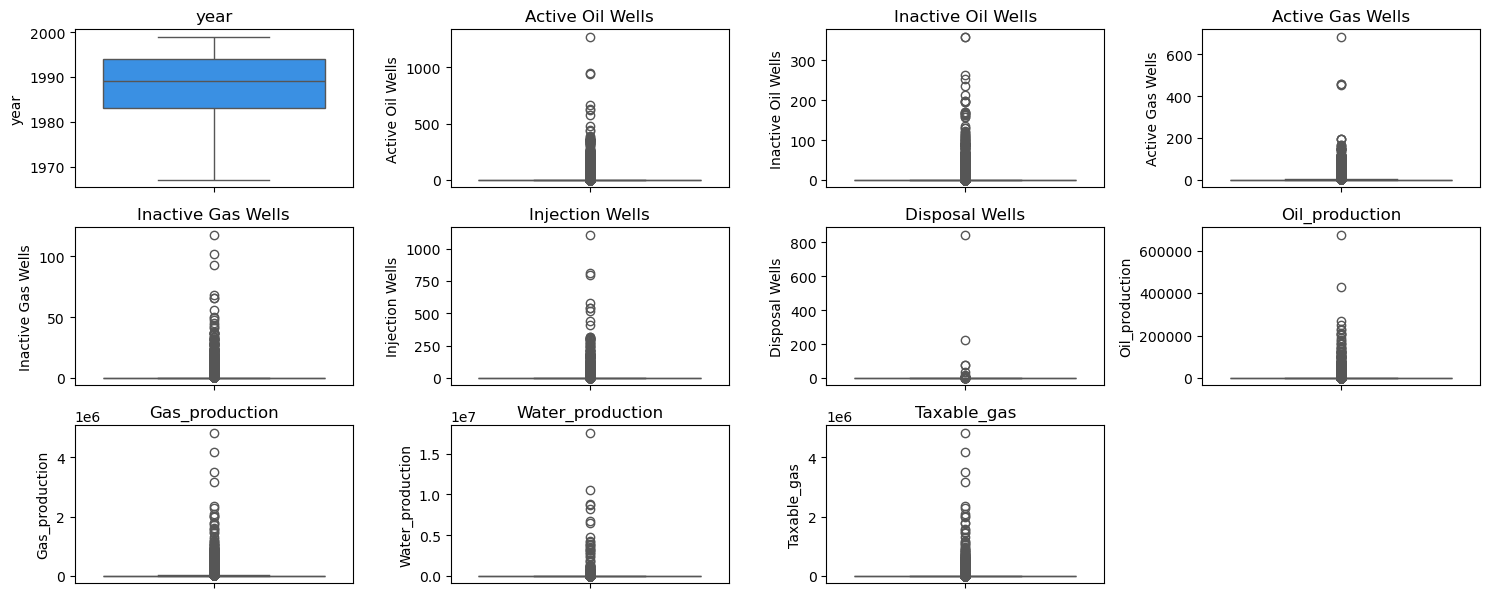

In [52]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[col], color='dodgerblue')
    plt.title(col)
plt.tight_layout()
plt.show()

#### # Histogram vew of data

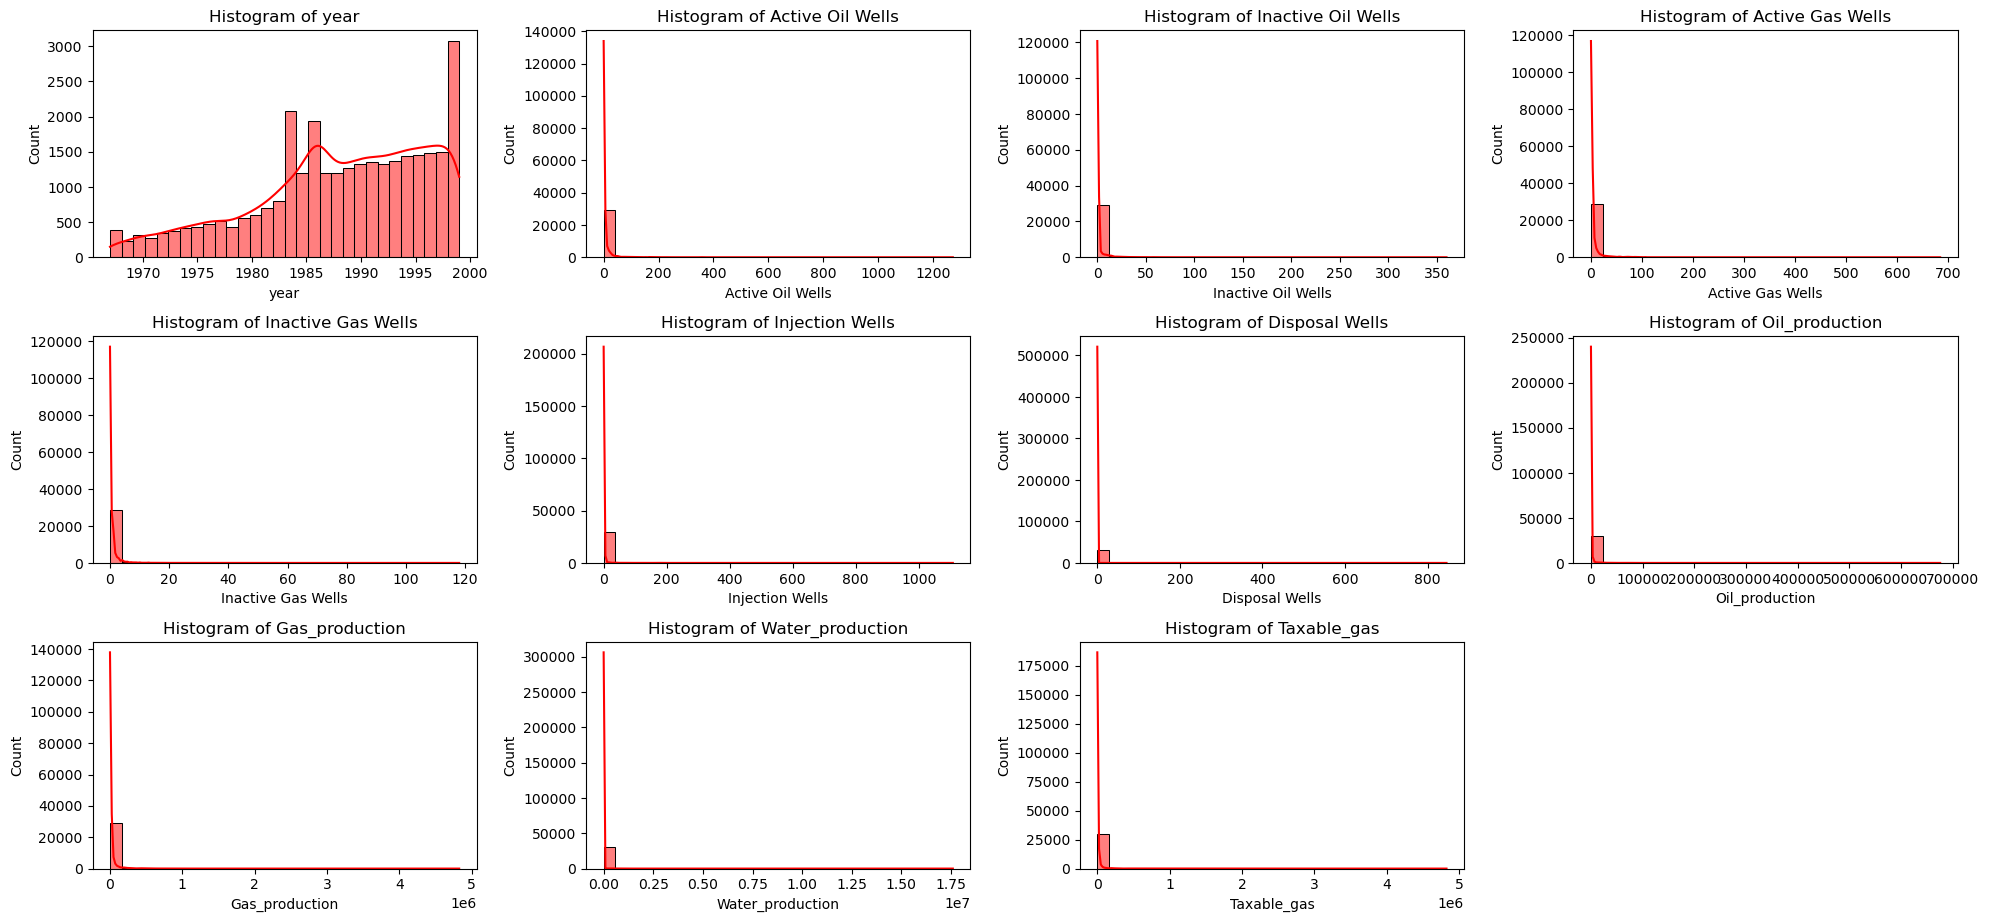

In [54]:
df1= df.copy()
plt.figure(figsize=(20, 15))
for i, col in enumerate(df1[num_cols], 1):
    plt.subplot(5, 4, i)  # Adjust rows/columns based on the number of features
    sns.histplot(df1[col], kde=True, bins=30, color='r')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

In [55]:
#### Histogram vew of data

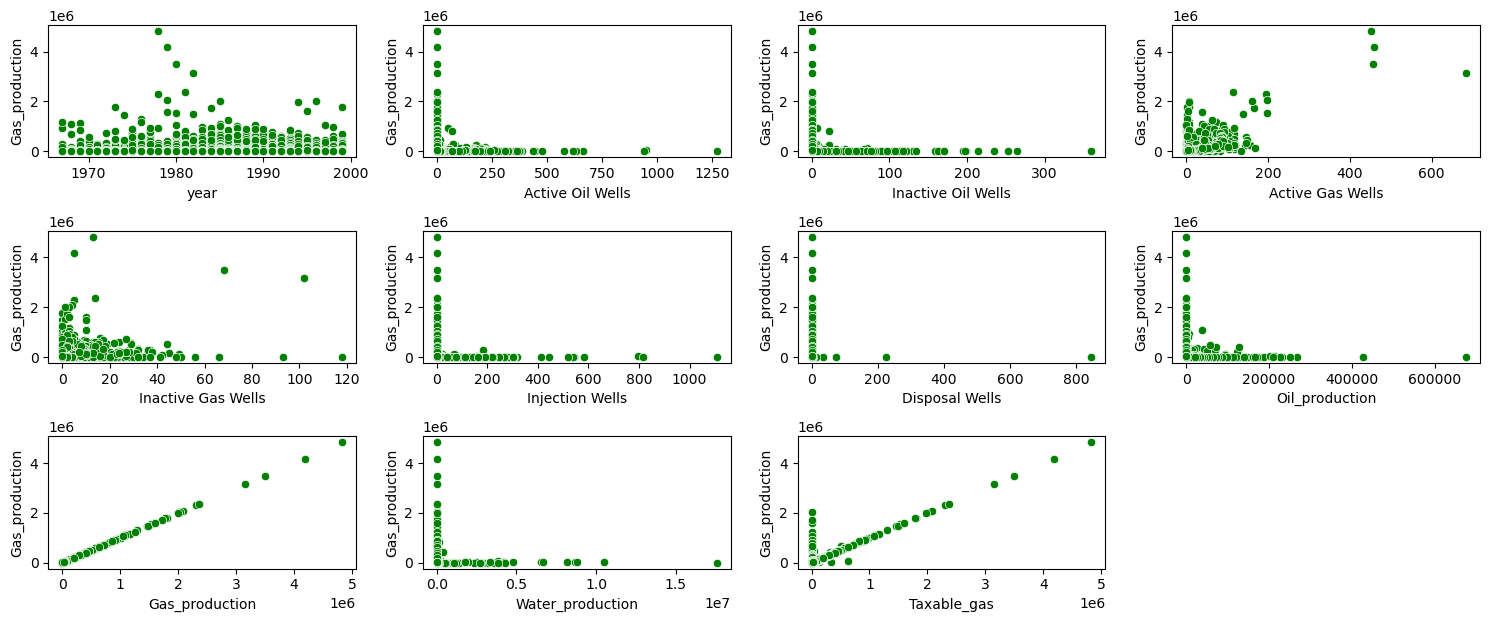

In [56]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df1[num_cols]):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df1,x=col,y='Gas_production',color='g')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

#### #Handling Outliers(IQR-Methode)

In [58]:
# IQR Methode 
def outliers(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - (1.5*IQR)
        upper = Q3 + (1.5*IQR)


        #Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
    return df

In [59]:
df1 = outliers(df)

##### # Data without outliers

In [61]:
df1.tail(5)

,year,Operator,Country,Town,Field,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,Oil_production,Gas_production,Water_production,Taxable_gas,Purchaser Codes,Location
30048,1995,"Eastern States Energy, Inc.",Erie,EVANS,BRANT-EDEN,0.0,0.0,5.0,0.0,0.0,0.0,NO,0.0,18015.0,0.0,0.0,GK,"EVANS, NY\n(42.638457, -79.027689)"
30049,1994,P & G Oil Co.,Allegany,WILLING,FULMER VALLEY,0.0,0.0,0.0,0.0,0.0,0.0,INACTIVE,0.0,0.0,0.0,0.0,Unknown,"WILLING, NY\n(42.085346, -77.922864)"
30050,1994,"Vandermark Exploration, Inc.",Steuben,WEST UNION,UNNAMED,0.0,0.0,0.0,0.0,0.0,0.0,INACTIVE,0.0,0.0,0.0,0.0,Unknown,"WEST UNION, NY\n(42.094951, -77.725816)"
30051,1995,Columbia Natural Resources LLC,Chautauqua,GERRY,LAKESHORE,0.0,0.0,1.0,0.0,0.0,0.0,NO,0.0,3370.0,0.0,0.0,GH,"GERRY, NY\n(42.194749, -79.250394)"
30052,1995,Belden & Blake Corporation,Erie,BRANT,BRANT-EDEN,0.0,0.0,5.0,0.0,0.0,0.0,YES,0.0,18015.0,0.0,0.0,GX,"BRANT, NY\n(42.58859, -79.044449)"


#### # Data without Outliers

##### #Boxplot view

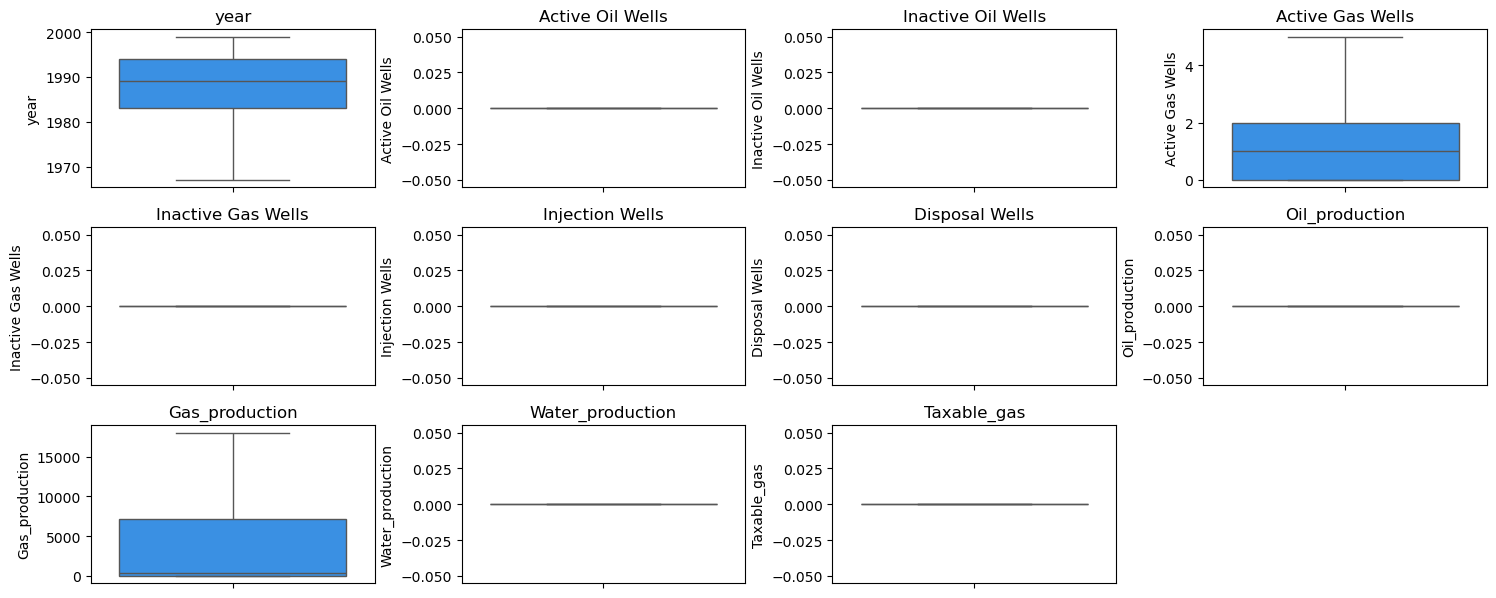

In [64]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df1[col], color='dodgerblue')
    plt.title(col)
plt.tight_layout()
plt.show()

##### # Histogram view

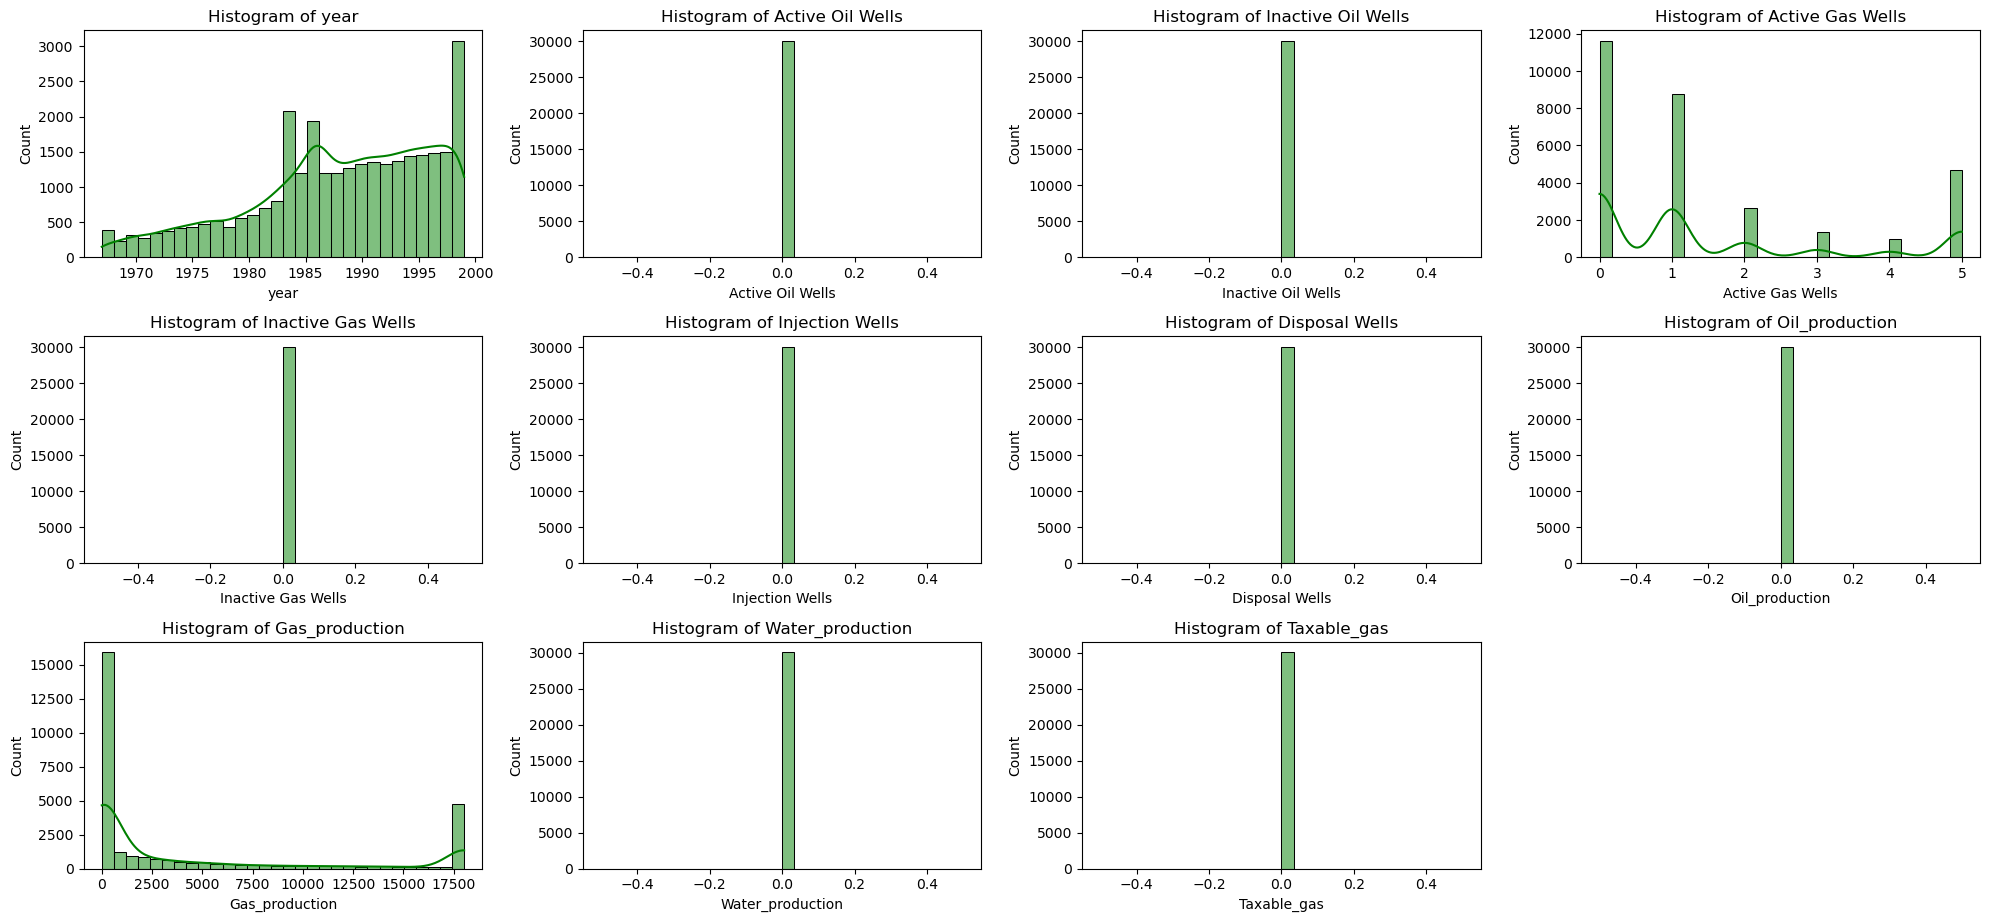

In [66]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(df1[num_cols], 1):
    plt.subplot(5, 4, i)  # Adjust rows/columns based on the number of features
    sns.histplot(df1[col], kde=True, bins=30, color='g')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

##### # Scatter plot view

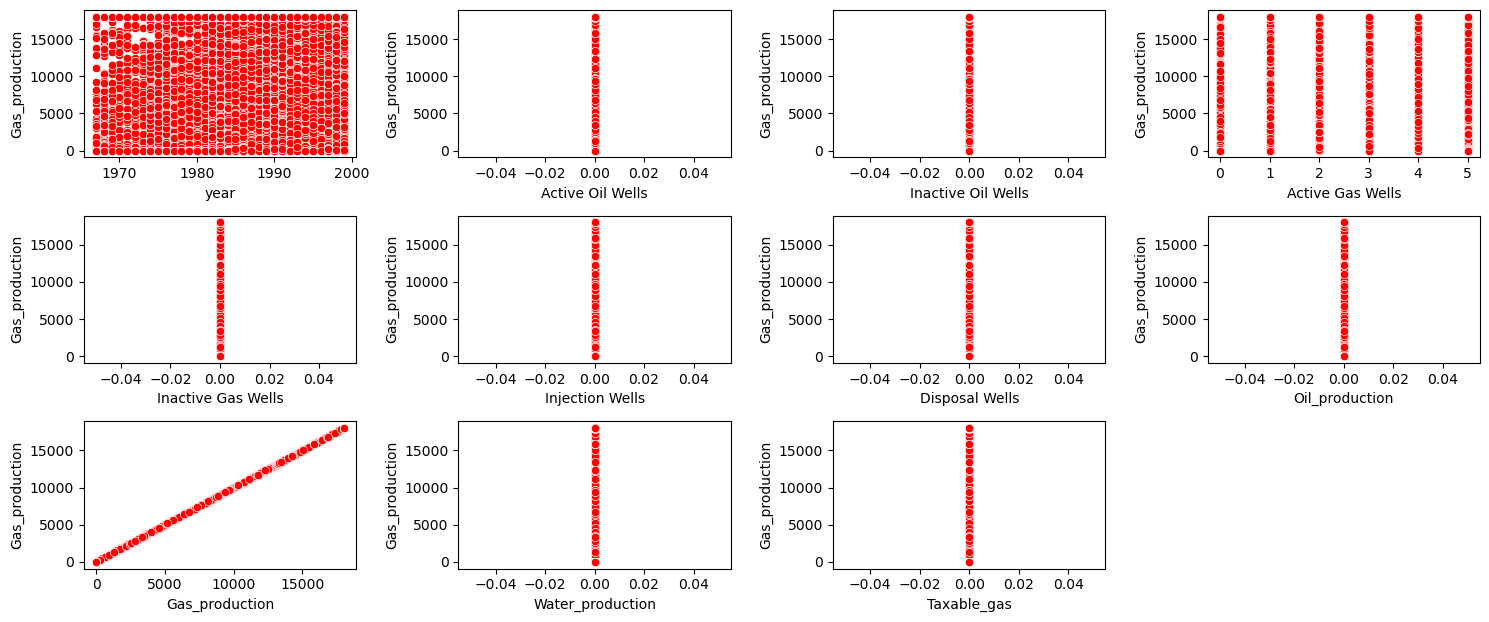

In [68]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df1[num_cols]):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df1,x=col,y='Gas_production',color='r')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

#### Skewness

In [70]:
skewness = df[num_cols].skew()

# Categorize skewness
no_skewness = skewness[(skewness >= -0.5) & (skewness <= 0.5)]
moderate_skewness = skewness[(skewness > 0.5) & (skewness <= 1) | (skewness < -0.5) & (skewness >= -1)]
high_skewness = skewness[(skewness > 1) | (skewness < -1)]

# Display results
print("Skewness of Numeric Columns:\n", skewness)
print("\nNo Skewness:\n", no_skewness)
print("\nModerate Skewness:\n", moderate_skewness)
print("\nHigh Skewness:\n", high_skewness)

Skewness of Numeric Columns:
 year                 -0.619160
Active Oil Wells      0.000000
Inactive Oil Wells    0.000000
Active Gas Wells      1.038094
Inactive Gas Wells    0.000000
Injection Wells       0.000000
Disposal Wells        0.000000
Oil_production        0.000000
Gas_production        1.204187
Water_production      0.000000
Taxable_gas           0.000000
dtype: float64

No Skewness:
 Active Oil Wells      0.0
Inactive Oil Wells    0.0
Inactive Gas Wells    0.0
Injection Wells       0.0
Disposal Wells        0.0
Oil_production        0.0
Water_production      0.0
Taxable_gas           0.0
dtype: float64

Moderate Skewness:
 year   -0.61916
dtype: float64

High Skewness:
 Active Gas Wells    1.038094
Gas_production      1.204187
dtype: float64


#### #Ploting features with skewness

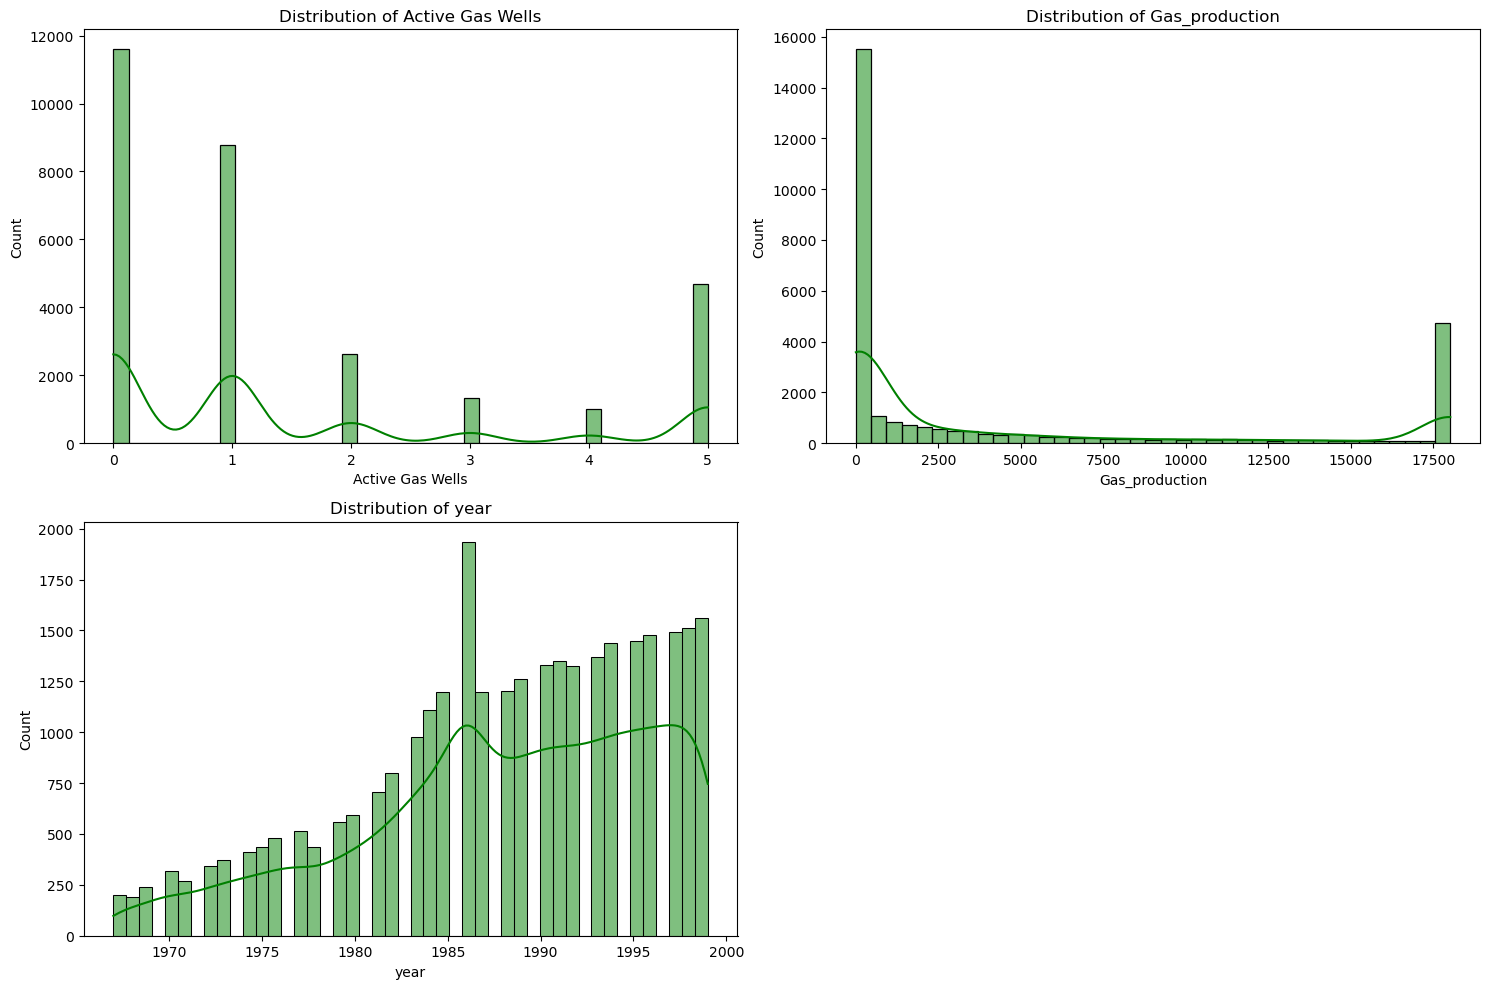

In [72]:
plt.figure(figsize=(15, 10))

# Loop through the desired columns
for i, col in enumerate(['Active Gas Wells', 'Gas_production', 'year' ], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df1[col], kde=True, color='green') 
    plt.title(f'Distribution of {col}') 

plt.tight_layout()  # Adjust spacing between plots
plt.show()

In [73]:
df1[['Active Gas Wells', 'Gas_production','year']].isnull().sum()

Active Gas Wells    0
Gas_production      0
year                0
dtype: int64

In [74]:
#Applying Square root transfomation
df1['Active Gas Wells'] = np.sqrt(df1['Active Gas Wells'])
df1['Gas_production'] = np.sqrt(df1['Gas_production'])

skewness = df1[['Active Gas Wells', 'Gas_production']].skew()
print("Skewness after transformation:\n", skewness)

Skewness after transformation:
 Active Gas Wells    0.270471
Gas_production      0.752704
dtype: float64


In [75]:
corr1=df1[num_cols].corr()

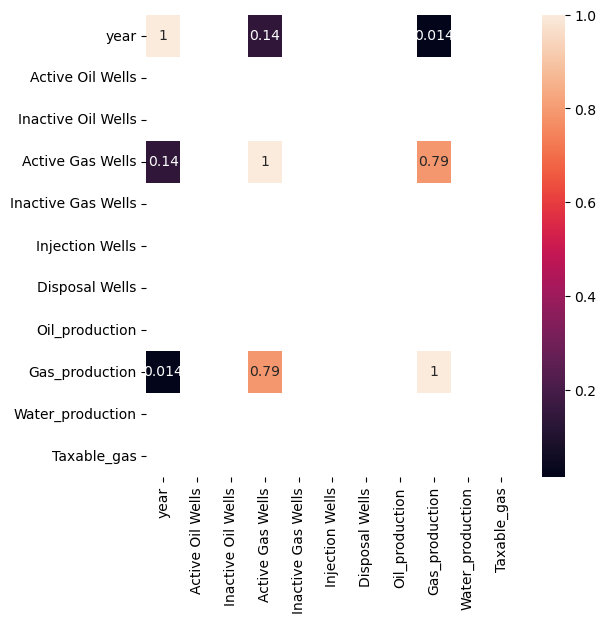

In [76]:
plt.figure(figsize= (6,6))
sns.heatmap(corr1, annot = True)
plt.savefig("corre.png")
plt.show()

#### #Kde plot of target variable¶

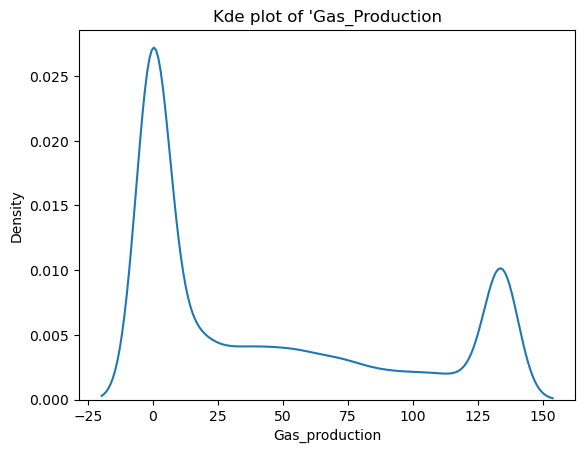

In [78]:
sns.kdeplot(df1.Gas_production)
plt.title("Kde plot of 'Gas_Production")
plt.show()

In [79]:
df1.head(10)

,year,Operator,Country,Town,Field,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,Oil_production,Gas_production,Water_production,Taxable_gas,Purchaser Codes,Location
0,1995,"Buffalo China, Inc.",Erie,BUFFALO,BUFFALO,0.0,0.0,1.000000,0.0,0.0,0.0,YES,0.0,10.295630,0.0,0.0,Unknown,"BUFFALO, NY\n(42.887691, -78.879374)"
1,1995,"Copper Ridge Oil, Inc.",Steuben,WEST UNION,BEECH HILL-INDEPENDENCE,0.0,0.0,0.000000,0.0,0.0,0.0,NO,0.0,0.000000,0.0,0.0,OA,"WEST UNION, NY\n(42.094951, -77.725816)"
2,1994,"White, Walter W. & Christina L.",Cattaraugus,CARROLLTON,BRADFORD,0.0,0.0,0.000000,0.0,0.0,0.0,NO,0.0,0.000000,0.0,0.0,OA,"CARROLLTON, NY\n(42.023289, -78.628438)"
3,1994,"Stiegler, Richard M",Erie,CHEEKTOWAGA,BUFFALO,0.0,0.0,1.000000,0.0,0.0,0.0,YES,0.0,23.021729,0.0,0.0,Unknown,"CHEEKTOWAGA, NY\n(42.907071, -78.754318)"
4,1995,"Bucher, Charles J",Cattaraugus,ALLEGANY,FIVE MILE,0.0,0.0,0.000000,0.0,0.0,0.0,NO,0.0,0.000000,0.0,0.0,OA,"ALLEGANY, NY\n(42.088061, -78.491258)"
5,1995,"Cotton Well Drilling Company, Inc.",Chautauqua,SHERIDAN,LAKESHORE,0.0,0.0,2.236068,0.0,0.0,0.0,NO,0.0,134.219969,0.0,0.0,GK,"SHERIDAN, NY\n(42.485764, -79.241801)"
6,1994,"Oil, Gas & Land Services, Inc.",Chautauqua,ELLERY,ELLERY,0.0,0.0,1.000000,0.0,0.0,0.0,NO,0.0,39.774364,0.0,0.0,"GX,OA","ELLERY, NY\n(42.159868, -79.393216)"
7,1994,"Traxler, Joyce",Genesee,LE ROY,UHLEY CORNERS-CALEDONIA,0.0,0.0,1.000000,0.0,0.0,0.0,YES,0.0,22.360680,0.0,0.0,Unknown,"LE ROY, NY\n(42.977677, -77.987588)"
8,1995,Cunningham Natural Gas Corp.,Allegany,WILLING,STATE LINE,0.0,0.0,1.000000,0.0,0.0,0.0,NO,0.0,134.219969,0.0,0.0,GX,"WILLING, NY\n(42.085346, -77.922864)"
9,1995,"Crowell, Walter R.",Chautauqua,VILLENOVA,LAKESHORE,0.0,0.0,1.000000,0.0,0.0,0.0,YES,0.0,10.000000,0.0,0.0,Unknown,"VILLENOVA, NY\n(42.391743, -79.119456)"


### # Feature -Engineering: Encoding features

##### #Label encoding because of boolean values

In [82]:
# Label encoding Feature self_use_well
le = LabelEncoder()

df1['Self-use Well'] = le.fit_transform(df1['Self-use Well'])

In [83]:
df1.head(5)

,year,Operator,Country,Town,Field,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,Oil_production,Gas_production,Water_production,Taxable_gas,Purchaser Codes,Location
0,1995,"Buffalo China, Inc.",Erie,BUFFALO,BUFFALO,0.0,0.0,1.0,0.0,0.0,0.0,3,0.0,10.295630,0.0,0.0,Unknown,"BUFFALO, NY\n(42.887691, -78.879374)"
1,1995,"Copper Ridge Oil, Inc.",Steuben,WEST UNION,BEECH HILL-INDEPENDENCE,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.000000,0.0,0.0,OA,"WEST UNION, NY\n(42.094951, -77.725816)"
2,1994,"White, Walter W. & Christina L.",Cattaraugus,CARROLLTON,BRADFORD,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.000000,0.0,0.0,OA,"CARROLLTON, NY\n(42.023289, -78.628438)"
3,1994,"Stiegler, Richard M",Erie,CHEEKTOWAGA,BUFFALO,0.0,0.0,1.0,0.0,0.0,0.0,3,0.0,23.021729,0.0,0.0,Unknown,"CHEEKTOWAGA, NY\n(42.907071, -78.754318)"
4,1995,"Bucher, Charles J",Cattaraugus,ALLEGANY,FIVE MILE,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.000000,0.0,0.0,OA,"ALLEGANY, NY\n(42.088061, -78.491258)"


#### # categerical columns 

In [85]:
cat_cols

Index(['Operator', 'Country', 'Town', 'Field', 'Self-use Well',
       'Purchaser Codes', 'Location'],
      dtype='object')

In [86]:
cat_cols1 = df.select_dtypes(include='object').columns

#### # removing unnecessory features

In [88]:
cat_cols1

Index(['Operator', 'Country', 'Town', 'Field', 'Purchaser Codes', 'Location'], dtype='object')

In [89]:
df1 = df1.drop('Town', axis = 1)
df1 = df1.drop('Field', axis = 1)
df1 = df1.drop('Location', axis = 1)
df1 = df1.drop('Purchaser Codes', axis = 1)
df1 = df1.drop('Operator', axis = 1)
df1 = df1.drop('Country', axis = 1)

In [90]:
df1

,year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,Oil_production,Gas_production,Water_production,Taxable_gas
0,1995,0.0,0.0,1.000000,0.0,0.0,0.0,3,0.0,10.295630,0.0,0.0
1,1995,0.0,0.0,0.000000,0.0,0.0,0.0,2,0.0,0.000000,0.0,0.0
2,1994,0.0,0.0,0.000000,0.0,0.0,0.0,2,0.0,0.000000,0.0,0.0
3,1994,0.0,0.0,1.000000,0.0,0.0,0.0,3,0.0,23.021729,0.0,0.0
4,1995,0.0,0.0,0.000000,0.0,0.0,0.0,2,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30048,1995,0.0,0.0,2.236068,0.0,0.0,0.0,2,0.0,134.219969,0.0,0.0
30049,1994,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0
30050,1994,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0
30051,1995,0.0,0.0,1.000000,0.0,0.0,0.0,2,0.0,58.051701,0.0,0.0


In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30049 entries, 0 to 30052
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                30049 non-null  int64  
 1   Active Oil Wells    30049 non-null  float64
 2   Inactive Oil Wells  30049 non-null  float64
 3   Active Gas Wells    30049 non-null  float64
 4   Inactive Gas Wells  30049 non-null  float64
 5   Injection Wells     30049 non-null  float64
 6   Disposal Wells      30049 non-null  float64
 7   Self-use Well       30049 non-null  int32  
 8   Oil_production      30049 non-null  float64
 9   Gas_production      30049 non-null  float64
 10  Water_production    30049 non-null  float64
 11  Taxable_gas         30049 non-null  float64
dtypes: float64(10), int32(1), int64(1)
memory usage: 2.9 MB


In [92]:
df1.columns

Index(['year', 'Active Oil Wells', 'Inactive Oil Wells', 'Active Gas Wells',
       'Inactive Gas Wells', 'Injection Wells', 'Disposal Wells',
       'Self-use Well', 'Oil_production', 'Gas_production', 'Water_production',
       'Taxable_gas'],
      dtype='object')

### # splitting dataset and setting target variable Fearture selection

In [94]:
y=df1.Gas_production

In [95]:
x=df1.drop('Gas_production', axis=1) 

In [96]:
x

,year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,Oil_production,Water_production,Taxable_gas
0,1995,0.0,0.0,1.000000,0.0,0.0,0.0,3,0.0,0.0,0.0
1,1995,0.0,0.0,0.000000,0.0,0.0,0.0,2,0.0,0.0,0.0
2,1994,0.0,0.0,0.000000,0.0,0.0,0.0,2,0.0,0.0,0.0
3,1994,0.0,0.0,1.000000,0.0,0.0,0.0,3,0.0,0.0,0.0
4,1995,0.0,0.0,0.000000,0.0,0.0,0.0,2,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
30048,1995,0.0,0.0,2.236068,0.0,0.0,0.0,2,0.0,0.0,0.0
30049,1994,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0
30050,1994,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0
30051,1995,0.0,0.0,1.000000,0.0,0.0,0.0,2,0.0,0.0,0.0


### # Feature  Selection :Filter meathodes

#### #SelectKBest Filter

In [99]:
from sklearn.feature_selection import SelectKBest, f_regression

# 1. Initialize SelectKBest with a scoring function and number of features to select
k_best = SelectKBest(score_func=f_regression, k=20)

# 2. Fit and transform the feature set (X) with respect to the target variable (y)
X_k_best = k_best.fit_transform(x, y)

# 3. Get the scores for each feature
feature_scores = k_best.scores_

# 4. Retrieve the names of the selected features
selected_features = x.columns[k_best.get_support()].tolist()

#selected_features = x.columns

# Output the results
print("SelectKBest Results:")
print(f"Features selected: {len(selected_features)}")
print("Selected features:", selected_features)
print("\nFeature Scores:")
#print(pd.DataFrame({'Feature': x.columns, 'Score': feature_scores}).sort_values(by='Score', ascending=False).head(12))

scores = pd.DataFrame({'Feature': x.columns, 'Score': feature_scores})

scores_sorted = scores.sort_values(by='Score', ascending=False).head(12)

print(scores_sorted)

# 4. Convert X_k_best to a DataFrame for scaling
X_k_best_df = pd.DataFrame(X_k_best, columns=selected_features)

SelectKBest Results:
Features selected: 11
Selected features: ['year', 'Active Oil Wells', 'Inactive Oil Wells', 'Active Gas Wells', 'Inactive Gas Wells', 'Injection Wells', 'Disposal Wells', 'Self-use Well', 'Oil_production', 'Water_production', 'Taxable_gas']

Feature Scores:
               Feature         Score
3     Active Gas Wells  50210.952507
7        Self-use Well   1824.790479
0                 year      6.029287
1     Active Oil Wells      0.000000
2   Inactive Oil Wells      0.000000
4   Inactive Gas Wells      0.000000
5      Injection Wells      0.000000
6       Disposal Wells      0.000000
8       Oil_production      0.000000
9     Water_production      0.000000
10         Taxable_gas      0.000000


In [100]:
X_k_best_df.head()

,year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,Oil_production,Water_production,Taxable_gas
0,1995.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
1,1995.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2,1994.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
3,1994.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
4,1995.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


## # Feature Scaling

In [102]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply different scaling methods
X_standardized = standard_scaler.fit_transform(X_k_best_df)
X_normalized = minmax_scaler.fit_transform(X_k_best_df)

In [103]:
# Convert to DataFrames for better visualization
X_standardized = pd.DataFrame(X_standardized, columns=selected_features)
X_normalized = pd.DataFrame(X_normalized, columns=selected_features)

In [104]:
X_standardized

,year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,Oil_production,Water_production,Taxable_gas
0,0.891130,0.0,0.0,0.110023,0.0,0.0,0.0,1.214878,0.0,0.0,0.0
1,0.891130,0.0,0.0,-1.095400,0.0,0.0,0.0,0.123489,0.0,0.0,0.0
2,0.765097,0.0,0.0,-1.095400,0.0,0.0,0.0,0.123489,0.0,0.0,0.0
3,0.765097,0.0,0.0,0.110023,0.0,0.0,0.0,1.214878,0.0,0.0,0.0
4,0.891130,0.0,0.0,-1.095400,0.0,0.0,0.0,0.123489,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
30044,0.891130,0.0,0.0,1.600008,0.0,0.0,0.0,0.123489,0.0,0.0,0.0
30045,0.765097,0.0,0.0,-1.095400,0.0,0.0,0.0,-2.059289,0.0,0.0,0.0
30046,0.765097,0.0,0.0,-1.095400,0.0,0.0,0.0,-2.059289,0.0,0.0,0.0
30047,0.891130,0.0,0.0,0.110023,0.0,0.0,0.0,0.123489,0.0,0.0,0.0


In [105]:
X_normalized

,year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,Oil_production,Water_production,Taxable_gas
0,0.87500,0.0,0.0,0.447214,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
1,0.87500,0.0,0.0,0.000000,0.0,0.0,0.0,0.666667,0.0,0.0,0.0
2,0.84375,0.0,0.0,0.000000,0.0,0.0,0.0,0.666667,0.0,0.0,0.0
3,0.84375,0.0,0.0,0.447214,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
4,0.87500,0.0,0.0,0.000000,0.0,0.0,0.0,0.666667,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
30044,0.87500,0.0,0.0,1.000000,0.0,0.0,0.0,0.666667,0.0,0.0,0.0
30045,0.84375,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
30046,0.84375,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
30047,0.87500,0.0,0.0,0.447214,0.0,0.0,0.0,0.666667,0.0,0.0,0.0


### Split Data into Training and Testing Sets

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2, random_state=42)

#### # selecting MinMax scaler for feature scaling

In [109]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Display shapes to confirm
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (24039, 11)
X_test_scaled shape: (6010, 11)


In [110]:
# Output the shapes of the new training and testing sets 
print("Training set shape (features):", X_train.shape) 
print("Test set shape (features):", X_test.shape) 
print("Training set shape (target):", y_train.shape) 
print("Test set shape (target):", y_test.shape)

Training set shape (features): (24039, 11)
Test set shape (features): (6010, 11)
Training set shape (target): (24039,)
Test set shape (target): (6010,)


## Model building 


In [112]:
models={
    'Linear Regressor':LinearRegression(),
    'Descision Tree Regressor':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'Gradient Boosting Regressor':GradientBoostingRegressor(),
    'Support Vector Regressor':SVR()
}

### MODEL EVALUATION

In [114]:
results ={}

for model_name, model in models.items():
    # fit the model
    model.fit(X_train_scaled, y_train)

    # prediction
    y_pred = model.predict(X_test_scaled)
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)

    # store the result
    results[model_name] = {"MAE":mae, "MSE":mse, "RMSE":rmse, "R2":r2}

results_df = pd.DataFrame(results).T
print(results_df)

                                   MAE         MSE       RMSE        R2
Linear Regressor             22.016050  934.655448  30.572135  0.652476
Descision Tree Regressor     18.133647  793.605014  28.170996  0.704922
Random Forest Regressor      18.133391  790.459524  28.115112  0.706091
Gradient Boosting Regressor  18.051735  759.974290  27.567631  0.717426
Support Vector Regressor     16.257464  828.599634  28.785407  0.691910


# BEST_MODEL

In [116]:
Best_model_name = results_df['R2'].idxmax()
print("The best model is:",Best_model_name)

The best model is: Gradient Boosting Regressor


### Hyper Parametric Tuning

In [118]:
# Define parameter grid
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [119]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
# Initialize model and GridSearchCV
gb_model = GradientBoostingRegressor()
grid_search_gb = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid_gb,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

In [120]:
# Fit the Grid Search to the data
grid_search_gb.fit(X_train_scaled, y_train)

best_params_gb = grid_search_gb.best_params_
best_score_gb = -grid_search_gb.best_score_  # Negative MSE is returned, convert to positive
print(f"Best Parameters: {best_params_gb}")
print(f"Best Score (MSE): {best_score_gb}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Score (MSE): 758.560117388521


In [248]:
# Evaluating after tuning
final_model = GradientBoostingRegressor(
    n_estimators= 50,
    learning_rate=0.1,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=4
)
# fit the model to train ing data
final_model.fit(X_train_scaled, y_train)

#Make prediction on the test set
y_pred_tuned = final_model.predict(X_test_scaled)

##Calculate performance metrics
final_metrics= {
    'MAE': mean_absolute_error(y_test, y_pred ),
    'MSE': mean_squared_error(y_test, y_pred ),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred )),
    'R2': r2_score(y_test, y_pred )
}

# Print final metrics
print("\nModel Performance After Tuning:")
for metric_name, value in final_metrics.items():
    print(f"{metric_name}: {value:.4f}")


Model Performance After Tuning:
MAE: 18.0517
MSE: 759.9743
RMSE: 27.5676
R2: 0.7174


### Saving the Model

In [123]:
joblib.dump(Best_model_name,'Gradient_Boosting_Model.joblib')
print("Model Saved")

Model Saved


## Pipeline; Creation

In [125]:
from sklearn.impute import SimpleImputer

In [126]:
# Create Pipeline
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler()),
    ('model',GradientBoostingRegressor())
])
# Train the pipe line
pipeline.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', GradientBoostingRegressor())])

In [127]:
# Predict on test data
y_pred = pipeline.predict(X_test)

### Saving the pipeline 

In [129]:
# Save the Entire Pipeline
joblib.dump(pipeline, 'Gradient_Regressor_pipeline.joblib')

['Gradient_Regressor_pipeline.joblib']

### #Testing with unseen_data

In [131]:
loaded_pipeline = joblib.load('Gradient_Regressor_pipeline.joblib')

In [132]:
df1.head()

,year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,Oil_production,Gas_production,Water_production,Taxable_gas
0,1995,0.0,0.0,1.0,0.0,0.0,0.0,3,0.0,10.295630,0.0,0.0
1,1995,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.000000,0.0,0.0
2,1994,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.000000,0.0,0.0
3,1994,0.0,0.0,1.0,0.0,0.0,0.0,3,0.0,23.021729,0.0,0.0
4,1995,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.000000,0.0,0.0


### Creating Unseen_data

In [134]:
df1.columns

Index(['year', 'Active Oil Wells', 'Inactive Oil Wells', 'Active Gas Wells',
       'Inactive Gas Wells', 'Injection Wells', 'Disposal Wells',
       'Self-use Well', 'Oil_production', 'Gas_production', 'Water_production',
       'Taxable_gas'],
      dtype='object')

### Testing with unseen Data

In [136]:
# Defining column and values for unseen data
columns = ['year', 'Active Oil Wells', 'Inactive Oil Wells', 'Active Gas Wells',
       'Inactive Gas Wells', 'Injection Wells', 'Disposal Wells',
       'Self-use Well', 'Oil_production', 'Water_production',
       'Taxable_gas','Gas_production']

In [137]:
# generating unseen data with random ranges

np.random.seed(42)
data= {
    "year":np.random.randint(1900, 2000, 5),
    "Active Oil Wells":np.random.randint(0, 5, 5),
    "Active Gas Wells":np.random.randint(0, 5, 5),
    "Inactive Oil Wells":np.random.randint(0, 5, 5),
    "Inactive Gas Wells":np.random.randint(0, 5, 5),
    "Injection Wells":np.random.randint(0, 5, 5),
    "Disposal Wells":np.random.randint(0, 5, 5),
    "Self-use Well":np.random.randint(0, 5, 5),
    "Water_production":np.random.randint(0, 5, 5),
    "Taxable_gas":np.random.randint(0, 5, 5),
    "Oil_production":np.random.randint(0, 5, 5),
    "Gas_production":np.random.randint(0, 5, 5)
}

In [138]:
unseen_data1 = pd.DataFrame(data,columns=columns)

In [139]:
# converting to csv file
unseen_data1.to_csv('unseen_data1.csv',index=False)

In [140]:
unseen_data1

,year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,Oil_production,Water_production,Taxable_gas,Gas_production
0,1951,4,3,4,3,0,3,2,3,1,1,2
1,1992,1,1,3,1,2,2,4,3,3,0,0
2,1914,2,3,2,4,2,3,2,3,0,1,3
3,1971,2,4,4,3,1,3,4,3,3,4,1
4,1960,2,0,1,0,3,0,0,4,1,1,3


### Spliting X & Y of unseen data

In [142]:
X_unseen = unseen_data1.drop('Gas_production', axis=1)
y_actual = unseen_data1['Gas_production']

In [143]:
X_unseen

,year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,Oil_production,Water_production,Taxable_gas
0,1951,4,3,4,3,0,3,2,3,1,1
1,1992,1,1,3,1,2,2,4,3,3,0
2,1914,2,3,2,4,2,3,2,3,0,1
3,1971,2,4,4,3,1,3,4,3,3,4
4,1960,2,0,1,0,3,0,0,4,1,1


### predict with unseen_data

In [145]:
y_unseen_pred = loaded_pipeline.predict(X_unseen)

In [146]:
unseen_data1['unseen_predictions'] = y_unseen_pred

In [147]:
unseen_data1.columns

Index(['year', 'Active Oil Wells', 'Inactive Oil Wells', 'Active Gas Wells',
       'Inactive Gas Wells', 'Injection Wells', 'Disposal Wells',
       'Self-use Well', 'Oil_production', 'Water_production', 'Taxable_gas',
       'Gas_production', 'unseen_predictions'],
      dtype='object')

In [148]:
#Transform the DataFrame to a csv file
unseen_data1.to_csv('unseen_test_data.csv',index=False)

#####  #Successfully predicted with unseen data

In [150]:
unseen_data1

,year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,Oil_production,Water_production,Taxable_gas,Gas_production,unseen_predictions
0,1951,4,3,4,3,0,3,2,3,1,1,2,71.563153
1,1992,1,1,3,1,2,2,4,3,3,0,0,71.563153
2,1914,2,3,2,4,2,3,2,3,0,1,3,71.563153
3,1971,2,4,4,3,1,3,4,3,3,4,1,71.563153
4,1960,2,0,1,0,3,0,0,4,1,1,3,43.726868


## Conclusions

#### #findings
   The best model for the prediction is Gradient Boosting Regressor with R2 score (0.7174)
   

##  Future works

> Experiment with Advanced Algorithms: Explore deep learning models like LSTMs or Transformers to capture complex patterns and temporal dependencies in the data.

> Periodic Updates: Regularly retrain the model with updated data to account for shifts in demand patterns and market conditions.

> Address Data Imbalances: Use resampling techniques (SMOTE, oversampling, or undersampling) to handle imbalanced categories and improve prediction accuracy for underrepresented segments.

> Scalability and Deployment: Optimize the pipeline for scalability and deploy it as a cloud-based service for real-time demand forecasting across various retailers.